In [12]:
# Getting airports data from apis
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [7]:
#Fet COVID-19 Data for All countries
url='https://disease.sh/v3/covid-19/countries'
response = requests.get(url)


In [10]:
#fetch data
data = response.json()


In [13]:
 # Convert JSON to DataFrame
df = pd.json_normalize(data)

In [14]:
# Display first few rows
df.head()

,updated,country,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,critical,...,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion,countryInfo._id,countryInfo.iso2,countryInfo.iso3,countryInfo.lat,countryInfo.long,countryInfo.flag
0,1749641696057,Afghanistan,234174,0,7996,0,211080,0,15098,0,...,29,370.46,5179.32,0.0,4.0,AF,AFG,33.0,65.0,https://disease.sh/assets/img/flags/af.png
1,1749641696049,Albania,334863,0,3605,0,330233,0,1025,0,...,1,357.59,115209.32,0.0,8.0,AL,ALB,41.0,20.0,https://disease.sh/assets/img/flags/al.png
2,1749641696052,Algeria,272010,0,6881,0,183061,0,82068,0,...,196,1809.65,4036.61,0.0,12.0,DZ,DZA,28.0,3.0,https://disease.sh/assets/img/flags/dz.png
3,1749641696113,Andorra,48015,0,165,0,0,0,47850,0,...,0,617714.26,0.00,0.0,20.0,AD,AND,42.5,1.6,https://disease.sh/assets/img/flags/ad.png
4,1749641696083,Angola,107327,0,1937,0,103419,0,1971,0,...,23,56.27,2952.52,0.0,24.0,AO,AGO,-12.5,18.5,https://disease.sh/assets/img/flags/ao.png


Data Cleaning and Preparation

In [15]:
# Check for missing values
print(df.isnull().sum())

updated                   0
country                   0
cases                     0
todayCases                0
deaths                    0
todayDeaths               0
recovered                 0
todayRecovered            0
active                    0
critical                  0
casesPerOneMillion        0
deathsPerOneMillion       0
tests                     0
testsPerOneMillion        0
population                0
continent                 0
oneCasePerPeople          0
oneDeathPerPeople         0
oneTestPerPeople          0
activePerOneMillion       0
recoveredPerOneMillion    0
criticalPerOneMillion     0
countryInfo._id           2
countryInfo.iso2          2
countryInfo.iso3          2
countryInfo.lat           0
countryInfo.long          0
countryInfo.flag          0
dtype: int64


In [17]:
# Select relevant columns
columns_to_keep = [
    'country', 'cases', 'todayCases', 'deaths', 'todayDeaths',
    'recovered', 'todayRecovered', 'active', 'critical',
    'casesPerOneMillion', 'deathsPerOneMillion', 'tests',
    'testsPerOneMillion', 'population', 'continent'
]
df = df[columns_to_keep]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              231 non-null    object
 1   cases                231 non-null    int64 
 2   todayCases           231 non-null    int64 
 3   deaths               231 non-null    int64 
 4   todayDeaths          231 non-null    int64 
 5   recovered            231 non-null    int64 
 6   todayRecovered       231 non-null    int64 
 7   active               231 non-null    int64 
 8   critical             231 non-null    int64 
 9   casesPerOneMillion   231 non-null    int64 
 10  deathsPerOneMillion  231 non-null    int64 
 11  tests                231 non-null    int64 
 12  testsPerOneMillion   231 non-null    int64 
 13  population           231 non-null    int64 
 14  continent            231 non-null    object
dtypes: int64(13), object(2)
memory usage: 27.2+ KB


In [19]:
# Convert numeric columns (some might be strings)
numeric_cols = ['cases', 'todayCases', 'deaths', 'todayDeaths',
               'recovered', 'todayRecovered', 'active', 'critical',
               'casesPerOneMillion', 'deathsPerOneMillion', 'tests',
               'testsPerOneMillion', 'population']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Fill missing values if needed
df.fillna(0, inplace=True)

Exploratory Data Analysis

In [20]:
# Basic Statistics

df.describe()

,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,critical,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion,population
count,2.310000e+02,231.0,2.310000e+02,231.0,2.310000e+02,231.000000,2.310000e+02,231.000000,231.000000,231.000000,2.310000e+02,2.310000e+02,2.310000e+02
mean,3.050883e+06,0.0,3.034927e+04,0.0,2.426700e+06,3.567100,5.938335e+05,12.454545,201193.108225,1238.640693,3.041777e+07,1.987980e+06,3.439366e+07
std,1.002125e+07,0.0,1.092314e+05,0.0,9.196220e+06,34.562905,3.893881e+06,71.172396,206119.715817,1308.862565,1.154321e+08,3.549881e+06,1.380709e+08
min,9.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.636600e+04,0.0,1.855000e+02,0.0,2.189500e+03,0.000000,6.750000e+01,0.000000,17656.500000,133.500000,2.260585e+05,8.465900e+04,4.281115e+05
50%,2.068970e+05,0.0,1.974000e+03,0.0,5.894700e+04,0.000000,1.283000e+03,0.000000,128681.000000,783.000000,1.690934e+06,7.173800e+05,5.554960e+06
75%,1.348198e+06,0.0,1.428700e+04,0.0,1.032544e+06,0.000000,2.775550e+04,0.000000,328620.500000,2040.000000,1.169128e+07,2.126400e+06,2.183934e+07
max,1.118201e+08,0.0,1.219487e+06,0.0,1.098144e+08,390.000000,4.450182e+07,940.000000,771655.000000,6595.000000,1.186852e+09,2.330212e+07,1.448471e+09


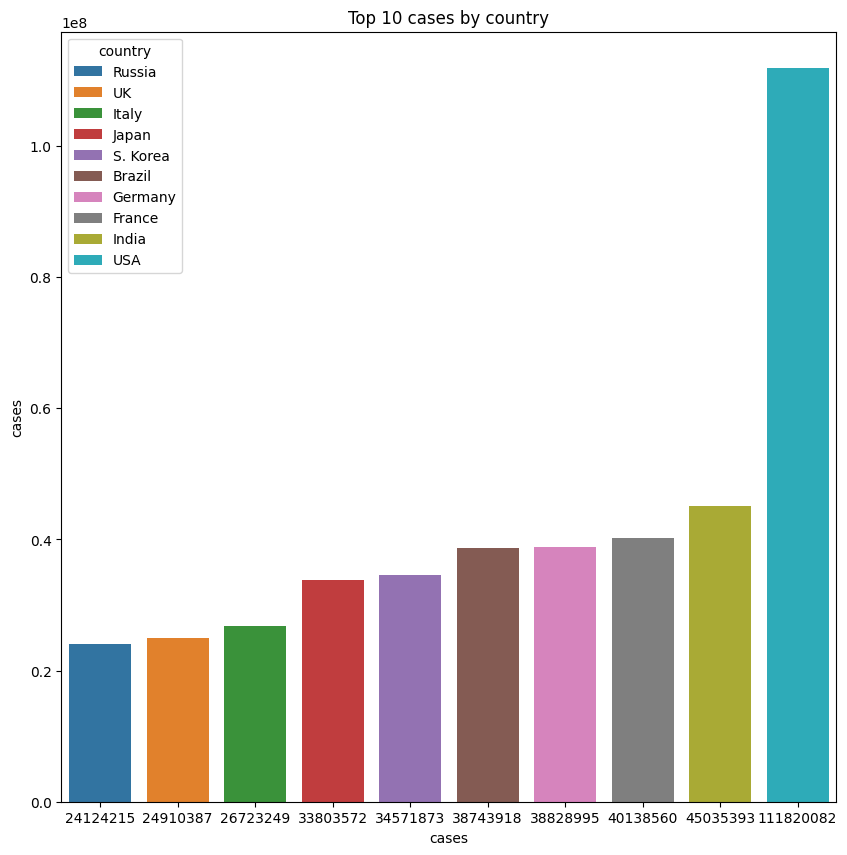

In [26]:
#top 10 Countries by Cases
top_cases = df.sort_values('cases', ascending=False).head(10)

plt.figure(figsize = (10,10))
sns.barplot(x='cases', y='cases', hue='country', data=top_cases)
plt.title('Top 10 cases by country')
plt.show()

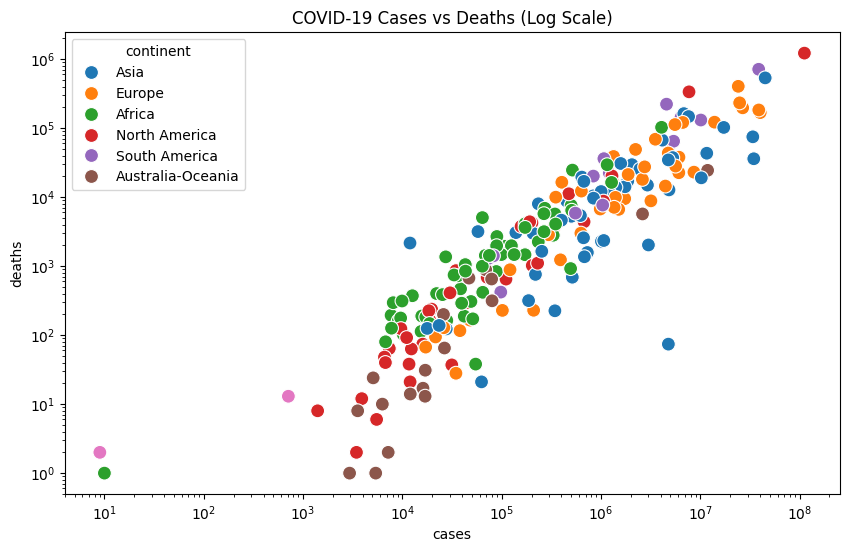

In [27]:
#Cases vs Deaths Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='cases', y='deaths', hue='continent', data=df, s=100)
plt.xscale('log')
plt.yscale('log')
plt.title('COVID-19 Cases vs Deaths (Log Scale)')
plt.show()

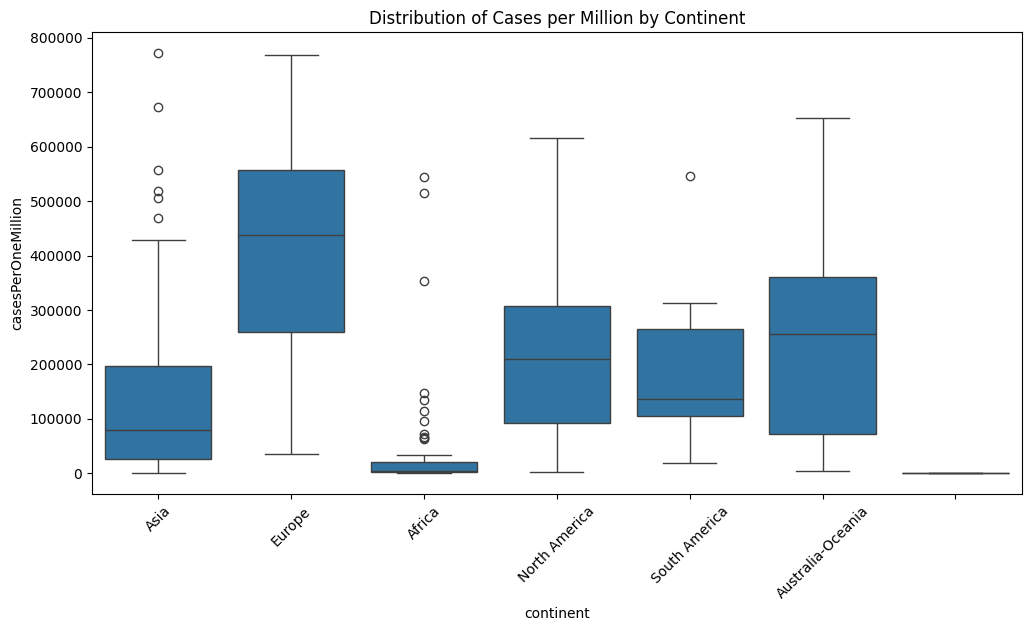

In [28]:
# Cases per Million by Continent
plt.figure(figsize=(12,6))
sns.boxplot(x='continent', y='casesPerOneMillion', data=df)
plt.title('Distribution of Cases per Million by Continent')
plt.xticks(rotation=45)
plt.show()

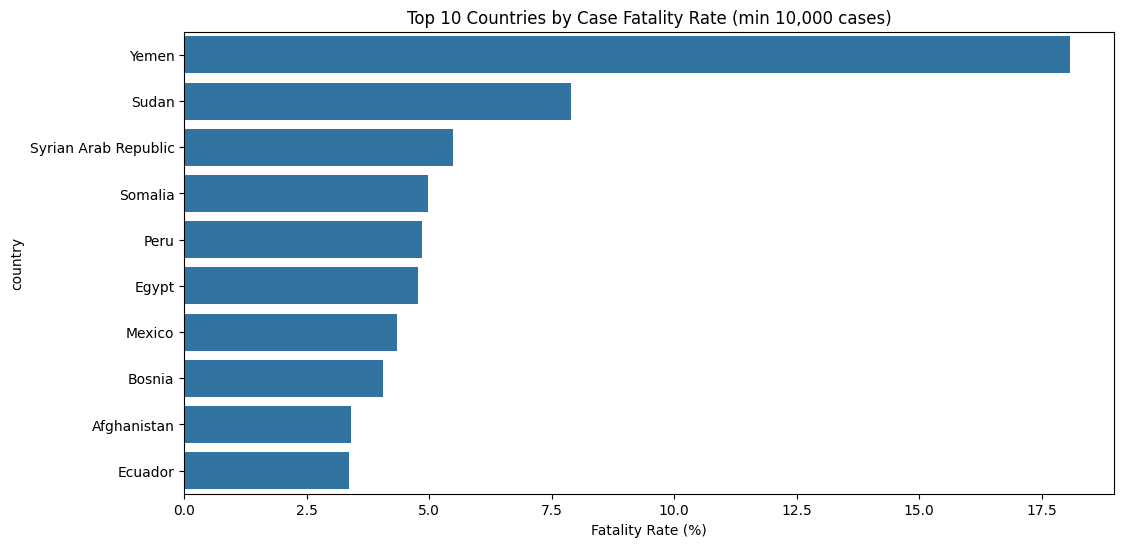

In [29]:
df['case_fatality_rate'] = (df['deaths'] / df['cases']) * 100

# Top 10 countries by CFR (with at least 10,000 cases)
cfr_top = df[df['cases'] > 10000].sort_values('case_fatality_rate', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='case_fatality_rate', y='country', data=cfr_top)
plt.title('Top 10 Countries by Case Fatality Rate (min 10,000 cases)')
plt.xlabel('Fatality Rate (%)')
plt.show()

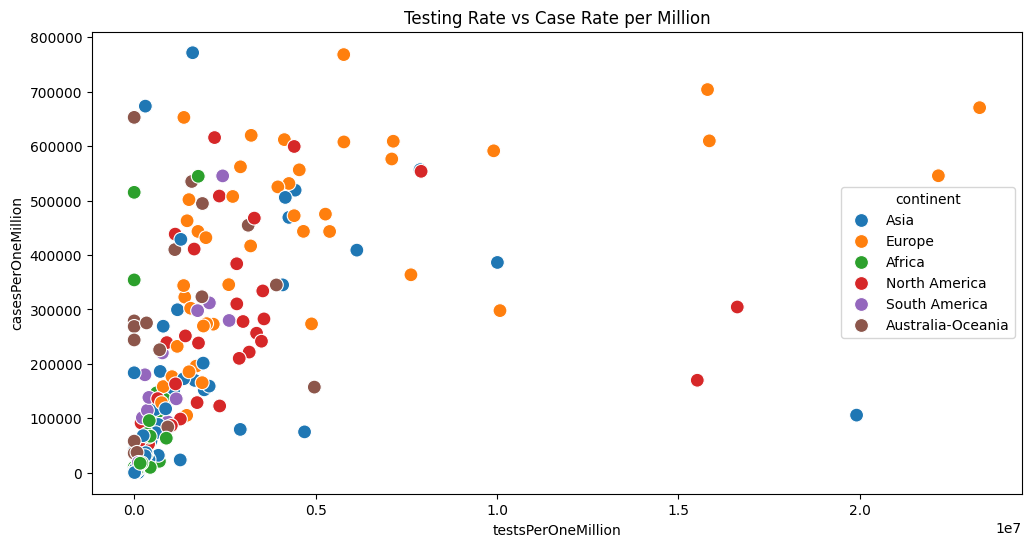

In [30]:
df['test_positivity_rate'] = (df['cases'] / df['tests']) * 100

plt.figure(figsize=(12,6))
sns.scatterplot(x='testsPerOneMillion', y='casesPerOneMillion', hue='continent', data=df, s=100)
plt.title('Testing Rate vs Case Rate per Million')
plt.show()

In [32]:
# Fetch historical data for a Kenya
ts_url = "https://disease.sh/v3/covid-19/historical/KENYA?lastdays=all"
ts_response = requests.get(ts_url)

In [35]:
ts_data = ts_response.json()

In [43]:
ts_df = pd.DataFrame(ts_data['timeline'])

ts_df.head()

,cases,deaths,recovered
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0


In [44]:
ts_df['date'] = pd.to_datetime(ts_df['date'])

KeyError: 'date'